<a href="https://colab.research.google.com/github/xuxiufeng/Instantaneous_and_limiting_behavior_of_an_n-node_blockchain_under_cyber_attacks_from_hackers/blob/main/Instantaneous_and_limiting_behavior_of_an_n-node_blockchain_with_random_re-setting_times_under_cyber_attacks_from_a_single_hacker/gamma-gamma-gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class simulation:
    def __init__(self, alpha, beta, eta, delta, theta, tau):
        self.alpha = alpha
        self.beta = beta
        self.eta = eta
        self.delta = delta
        self.theta = theta
        self.tau = tau

    def T_m_and_reset_time(self, m):
        alpha, beta, eta, delta, theta, tau = self.alpha, self.beta, self.eta, self.delta, self.theta, self.tau
        sum_of_y_and_w = 0
        y = np.random.gamma(alpha, 1/beta)
        sum_of_x = np.sum(np.random.gamma(eta, 1/delta, m))
        w = np.random.gamma(theta, 1/tau)

        reset_time_start = []
        reset_time_end = []

        current_time = 0
        while sum_of_x > y:

            current_time += y
            reset_time_start.append(current_time)
            current_time += w
            reset_time_end.append(current_time)


            sum_of_y_and_w = sum_of_y_and_w + y + w
            sum_of_x = np.sum(np.random.gamma(eta, 1/delta, m))
            y = np.random.gamma(alpha, 1/beta)
            w = np.random.gamma(theta, 1/tau)
        return sum_of_y_and_w + sum_of_x, reset_time_start, reset_time_end

    def ET_m(self, m):

      ET = np.repeat(np.nan, m)
      for i in range(m):
          T_0 = 0
          iter = 30000 # iter 30000
          for j in range(iter):
              T_0 += self.T_m_and_reset_time(i+1)[0]
          ET[i] = T_0/iter
      return ET

    def P_mt1(self, t, m, N=50000): # 50000

      res = np.repeat(np.nan, N)
      Prob = np.repeat(np.nan, m)
      node = 1
      for i in range(m):
          for j in range(N):
               dyfunctional_time, reset_time_start, reset_time_end = self.T_m_and_reset_time(node)

               res[j] = t < dyfunctional_time
               for k in range(len(reset_time_start)):
                   reset_start, reset_end = reset_time_start[k], reset_time_end[k]
                   if reset_start < t < reset_end:
                       res[j] = 0

          Prob[i] = np.sum(res)/N
          node += 1
      return Prob

    def P_mt2(self, t, node, N=10000): # 10000

      res = np.repeat(np.nan, N)


      for j in range(N):
            dyfunctional_time, reset_time_start, reset_time_end = self.T_m_and_reset_time(node)

            res[j] = t < dyfunctional_time
            for k in range(len(reset_time_start)):
                reset_start, reset_end = reset_time_start[k], reset_time_end[k]
                if reset_start < t < reset_end:
                    res[j] = 0

      Prob = np.sum(res)/N

      return Prob

    def T_mNR(self, C1, C2, R, m):
      C1, C2, R = C1*m, C2*m**.5, R*m
      T_m, reset_time_start, reset_time_end= self.T_m_and_reset_time(m)
      sum_of_w = 0
      for j in range(len(reset_time_start)):
          sum_of_w += (reset_time_end[j] - reset_time_start[j])
      return (T_m - sum_of_w)*(R-C2)-C1*sum_of_w, T_m

    def E_mNR(self, C1, C2, R, m, N=100000):
      expected_net_revenue = []
      for node in range(1, m+1):
        sum_of_total_net_revenue_rate = 0
        for i in range(N):
            total_net_revenue, T_m = self.T_mNR(C1, C2, R, node)
            sum_of_total_net_revenue_rate += total_net_revenue/T_m
        expected_net_revenue.append(sum_of_total_net_revenue_rate/N)
      return expected_net_revenue

In [ ]:
sim = simulation(2, 1/10, 0.05, 1/15, 1.5, 1/8)
m = 40

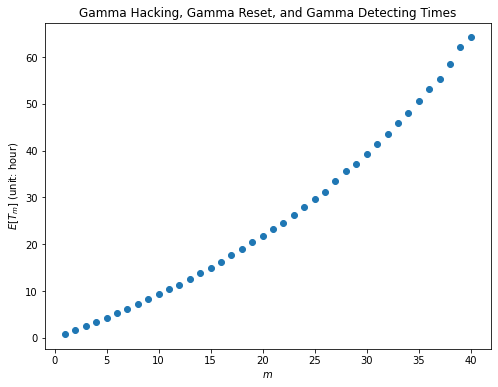

In [ ]:
ET_m = sim.ET_m(m)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking, Gamma Reset, and Gamma Detecting Times')
plt.show()

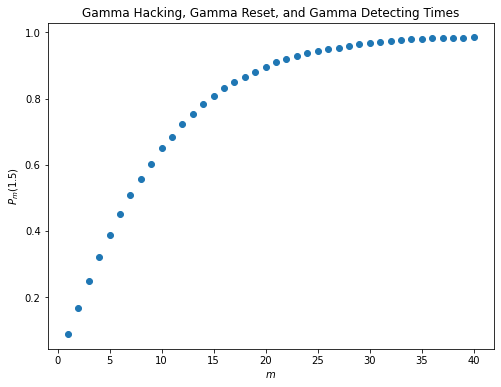

In [ ]:
t_cross_section = 1.5
P_mt = sim.P_mt1(t_cross_section, m)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), P_mt)
plt.xlabel(r'$m$')
plt.ylabel(r'$P_m(1.5)$')
plt.title('Gamma Hacking, Gamma Reset, and Gamma Detecting Times')
plt.show()

In [ ]:
node = np.array(range(1, m+1))
t = np.array(np.linspace(0.1, 10, len(node)))
node_axis = np.repeat(np.nan, len(node)*len(t))
t_axis = np.repeat(np.nan, len(node)*len(t))
P_axis = np.repeat(np.nan, len(node)*len(t))
index = 0
for i in range(len(node)):
    for j in range(len(t)):
        node_axis[index] = node[i]
        t_axis[index] = t[j]
        P_axis[index] = sim.P_mt2(t_axis[index], int(node_axis[index]))
        index += 1

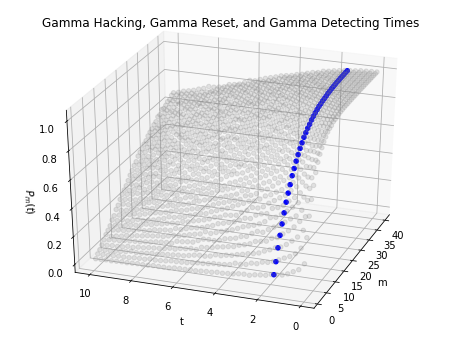

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(node_axis, t_axis, P_axis, alpha=0.2, c='grey')
ax.scatter3D(node, np.repeat(t_cross_section, len(node)), P_mt, alpha=1, c='blue')
ax.view_init(30, 200)
ax.set_yticks(np.linspace(0, 10, 6))
ax.set_xlabel('m')
ax.set_ylabel('t')
ax.set_zlabel(r'$P_m(t)$')
ax.set_title('Gamma Hacking, Gamma Reset, and Gamma Detecting Times')
plt.show()

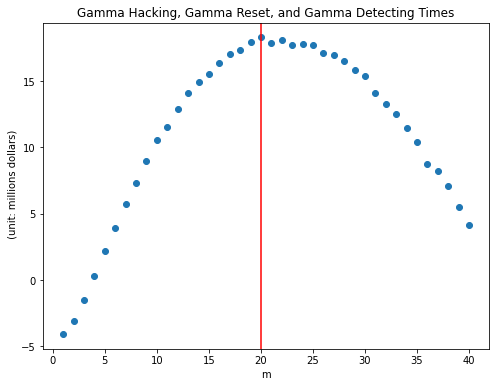

In [ ]:
expected_net_revenue = sim.E_mNR(12,9,5, m)
m_max = np.where(expected_net_revenue == max(expected_net_revenue))[0][0] + 1
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), expected_net_revenue)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'm')
plt.ylabel(r' (unit: millions dollars)')
plt.title('Gamma Hacking, Gamma Reset, and Gamma Detecting Times')
plt.show()

In [ ]:
max(expected_net_revenue), m_max

(18.296190601138072, 20)